In [1]:
import os, cv2, glob, json, random
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = ".."  
DATA_RAW_YES = os.path.join(ROOT_DIR, "data", "yes")
DATA_RAW_NO  = os.path.join(ROOT_DIR, "data", "no")
DATA_OUT = os.path.join(ROOT_DIR, "data", "processed")
os.makedirs(DATA_OUT, exist_ok=True)

In [3]:
IMG_SIZE = 224
random.seed(42)
np.random.seed(42)

In [4]:
def read_folder(folder, label):
    data = []
    for fp in sorted(glob.glob(os.path.join(folder, "*"))):
        if fp.lower().endswith((".jpg",".jpeg",".png")):
            img = cv2.imread(fp, cv2.IMREAD_COLOR)
            if img is None: 
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img.astype(np.float32) / 255.0
            data.append((img, label))
    return data

In [5]:
yes = read_folder(DATA_RAW_YES, 1)
no  = read_folder(DATA_RAW_NO, 0)
assert len(yes) > 0 and len(no) > 0, "⚠️ Raw folders (yes/no) seem empty."

In [6]:
all_data = yes + no
random.shuffle(all_data)

X = np.array([d[0] for d in all_data], dtype=np.float32)
y = np.array([d[1] for d in all_data], dtype=np.int64)

In [7]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test   = train_test_split(X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=42)

In [8]:
np.save(os.path.join(DATA_OUT, "X_train.npy"), X_train)
np.save(os.path.join(DATA_OUT, "y_train.npy"), y_train)
np.save(os.path.join(DATA_OUT, "X_val.npy"),   X_val)
np.save(os.path.join(DATA_OUT, "y_val.npy"),   y_val)
np.save(os.path.join(DATA_OUT, "X_test.npy"),  X_test)
np.save(os.path.join(DATA_OUT, "y_test.npy"),  y_test)

In [9]:
meta = {
    "train_size": len(y_train),
    "val_size": len(y_val),
    "test_size": len(y_test),
    "img_size": IMG_SIZE
}
with open(os.path.join(DATA_OUT, "dataset_meta.json"), "w") as f:
    json.dump(meta, f, indent=2)

print("✅ Saved splits and metadata to:", DATA_OUT)

✅ Saved splits and metadata to: ..\data\processed


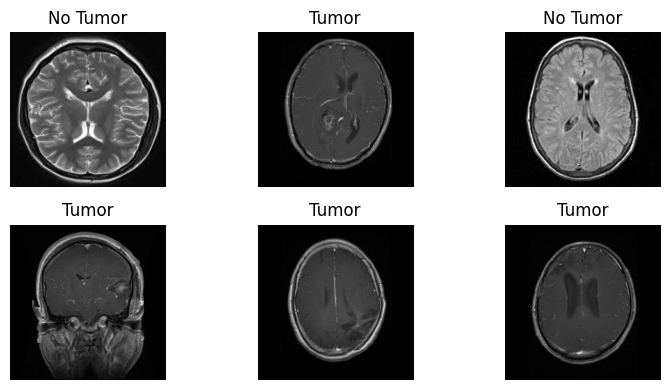

In [10]:
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i])
    plt.title("Tumor" if y_train[i]==1 else "No Tumor")
    plt.axis("off")
plt.tight_layout()
plt.show()